## Exploratory Data Analysis
* Data Cleaning
    * Loading the Dataset
    * Understanding the Dataset
    * Looking for null values in the Dataset
    * Handling missing values using different techniques
* Data Transformation
* Data Extraction
* Save cleaned and transformed Dataset


In [1]:
# import required packages and modules
import sys
sys.path.insert(0,'../scripts/')

import pandas as pd
import numpy as np
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data loading function
from data_loading import load_data_from_csv

# dataframe description script file
from data_description import DataDescription

In [3]:
# load the dataset into a dataframe

pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.3f}".format


# list of possible na_values
na_values = ["n/a", "na", 'none', "-", "--", None, '?']

df = load_data_from_csv("../data/telecom_data_source.csv",na_values)

In [4]:
# create dataframe object from DataDescription class
df_description = DataDescription(df)

# display top 5 rows of the dataframe
df_description.df_head()

                 Bearer Id            Start  Start ms              End  \
0 13114483460844900352.000   4/4/2019 12:01   770.000  4/25/2019 14:35   
1 13114483482878900224.000   4/9/2019 13:04   235.000   4/25/2019 8:15   
2 13114483484080500736.000   4/9/2019 17:42     1.000  4/25/2019 11:58   
3 13114483485442799616.000   4/10/2019 0:31   486.000   4/25/2019 7:36   
4 13114483499480700928.000  4/12/2019 20:10   565.000  4/25/2019 10:40   

   End ms   Dur. (ms)                IMSI   MSISDN/Number               IMEI  \
0 662.000 1823652.000 208201448079117.000 33664962239.000 35521209507511.000   
1 606.000 1365104.000 208201909211140.000 33681854413.000 35794009006359.000   
2 652.000 1361762.000 208200314458056.000 33760627129.000 35281510359387.000   
3 171.000 1321509.000 208201402342131.000 33750343200.000 35356610164913.000   
4 954.000 1089009.000 208201401415120.000 33699795932.000 35407009745539.000   

      Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0  9.1645669

In [5]:
# display dataframe column list
df_description.df_columns_list()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [6]:
# display dataframe's info
df_description.df_detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
# display null counts for each column
df_description.df_null_counts()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
# display null(missing values)  percentage of each column
df_description.df_null_column_percentage()

The dataset contains 
Bearer Id                                  0.010
Start                                      0.000
Start ms                                   0.000
End                                        0.000
End ms                                     0.000
Dur. (ms)                                  0.000
IMSI                                       0.010
MSISDN/Number                              0.010
IMEI                                       0.010
Last Location Name                         0.010
Avg RTT DL (ms)                            0.340
Avg RTT UL (ms)                            0.340
Avg Bearer TP DL (kbps)                    0.000
Avg Bearer TP UL (kbps)                    0.000
TCP DL Retrans. Vol (Bytes)                1.070
TCP UL Retrans. Vol (Bytes)                1.170
DL TP < 50 Kbps (%)                        0.010
50 Kbps < DL TP < 250 Kbps (%)             0.010
250 Kbps < DL TP < 1 Mbps (%)              0.010
DL TP > 1 Mbps (%)                         0.01

In [9]:
# display null(missing values) percentage of dataset
df_description.df_total_null_column_percentage()

The dataset contains 12.5% missing values.



##### When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.
##### When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve. In this type of distribution the mean, median, and mode of the distribution are negative rather than positive or zero.

##### When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve. In this type of distribution the mean, median, and mode of the distribution are positive rather than negative or zero.



In [10]:
# display skewness of each columns

df_description.df_skewness()

Bearer Id                                    0.027
Start ms                                     0.001
End ms                                      -0.001
Dur. (ms)                                    3.953
IMSI                                        41.046
MSISDN/Number                              332.156
IMEI                                         1.071
Avg RTT DL (ms)                             62.908
Avg RTT UL (ms)                             28.457
Avg Bearer TP DL (kbps)                      2.589
Avg Bearer TP UL (kbps)                      4.503
TCP DL Retrans. Vol (Bytes)                 15.952
TCP UL Retrans. Vol (Bytes)                 84.113
DL TP < 50 Kbps (%)                         -2.298
50 Kbps < DL TP < 250 Kbps (%)               3.271
250 Kbps < DL TP < 1 Mbps (%)                4.566
DL TP > 1 Mbps (%)                           5.370
UL TP < 10 Kbps (%)                         -8.985
10 Kbps < UL TP < 50 Kbps (%)               10.944
50 Kbps < UL TP < 300 Kbps (%) 

In [11]:
# displays the size ( or shape) of the dataframe
df_description.df_size()

The DataFrame containes  150001 rows and 55 columns



### Data Cleaning

In [12]:
from data_cleaning import DataCleaning

# create dataframe object from DataDescription class
cleaned_df = DataCleaning(df)

In [13]:
# drop columns with more than 30% missing values
df = cleaned_df.drop_column_with_many_null_values()

['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B']


In [14]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.000,4/4/2019 12:01,770.000,4/25/2019 14:35,662.000,1823652.000,208201448079117.000,33664962239.000,35521209507511.000,9.16456699548519E+015,42.000,5.000,23.000,44.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,37624.000,38787.000,1823652892.000,Samsung,Samsung Galaxy A5 Sm-A520F,213.000,214.000,1545765.000,24420.000,1634479.000,1271433.000,3563542.000,137762.000,15854611.000,2501332.000,8198936.000,9656251.000,278082303.000,14344150.000,171744450.000,8814393.000,36749741.000,308879636.000
1,13114483482878900224.000,4/9/2019 13:04,235.000,4/25/2019 8:15,606.000,1365104.000,208201909211140.000,33681854413.000,35794009006359.000,L77566A,65.000,5.000,16.000,26.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,168.000,3560.000,1365104371.000,Samsung,Samsung Galaxy J5 (Sm-J530),971.000,1022.000,1926113.000,7165.000,3493924.000,920172.000,629046.000,308339.000,20247395.000,19111729.000,18338413.000,17227132.000,608750074.000,1170709.000,526904238.000,15055145.000,53800391.000,653384965.000
2,13114483484080500736.000,4/9/2019 17:42,1.000,4/25/2019 11:58,652.000,1361762.000,208200314458056.000,33760627129.000,35281510359387.000,D42335A,NaN,NaN,6.000,9.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,1361762651.000,Samsung,Samsung Galaxy A8 (2018),751.000,695.000,1684053.000,42224.000,8535055.000,1694064.000,2690151.000,672973.000,19725661.000,14699576.000,17587794.000,6163408.000,229584621.000,395630.000,410692588.000,4215763.000,27883638.000,279807335.000
3,13114483485442799616.000,4/10/2019 0:31,486.000,4/25/2019 7:36,171.000,1321509.000,208201402342131.000,33750343200.000,35356610164913.000,T21824A,NaN,NaN,44.000,44.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,3330.000,37882.000,1321509685.000,undefined,undefined,17.000,207.000,644121.000,13372.000,9023734.000,2788027.000,1439754.000,631229.000,21388122.000,15146643.000,13994646.000,1097942.000,799538153.000,10849722.000,749039933.000,12797283.000,43324218.000,846028530.000
4,13114483499480700928.000,4/12/2019 20:10,565.000,4/25/2019 10:40,954.000,1089009.000,208201401415120.000,33699795932.000,35407009745539.000,D88865A,NaN,NaN,6.000,9.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,1089009389.000,Samsung,Samsung Sm-G390F,607.000,604.000,862600.000,50188.000,6248284.000,1500559.000,1936496.000,173853.000,15259380.000,18962873.000,17124581.000,415218.000,527707248.000,3529801.000,550709500.000,13910322.000,38542814.000,569138589.000


In [15]:
# remove duplicates
df =cleaned_df.remove_duplicates()

In [16]:
# convert datatype of start and end columns into datetime
df = cleaned_df.convert_to_datetime(df)

In [17]:
df_description.df_detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       149010 non-null  float64       
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150000 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150000 non-null  float64       
 5   Dur. (ms)                       150000 non-null  float64       
 6   IMSI                            149431 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            149429 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 122172 non-null  float64

### Handling Missing Values

In [18]:
df.describe(include='object').columns.to_list()

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [19]:
# fill the missing values of categorical columns
columns = ['Last Location Name','Handset Type', 'Handset Manufacturer']
df = cleaned_df.fill_categorical_column(columns)

In [20]:
# fill the missing values of numerical columns
column_list = pd.isnull(df).columns[pd.isnull(df).sum() > 0].tolist()
df = cleaned_df.fill_numerical_column(column_list)

In [21]:
df_description.df_null_counts()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [22]:
# display dataframe's info
df_d = DataDescription(df)
# check null values
df.isnull().sum().sum()

0

In [23]:
# cols = ['col_1', 'col_2'] # one or more

# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
# dsiplay the dataframe's descriptive statistics
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000
mean,10120448840645199872.000,499.188,498.801,104608.439,208201639297050.625,41824409439.846,48425918621507.172,97.774,15.315,13299.958,1770.417,92.881,3.054,1.709,1.602,98.538,0.773,0.147,0.079,1829164.939,1408870.887,104608984.153,3702.087,4001.967,1795321.774,32928.434,5750752.619,2056541.926,1791728.868,467373.442,11634072.504,11009410.135,11626851.719,11001754.820,422044702.595,8288398.111,421100544.194,8264799.424,41121206.439,454643438.063
std,2892437846624034304.000,288.611,288.097,81037.365,21447225377.498,2438731368208.443,22387392564342.691,559.909,76.688,23971.823,4625.342,13.015,6.203,4.151,4.818,4.623,3.217,1.620,1.292,5696378.352,4643216.453,81037355.090,9151.883,10137.188,1035482.276,19006.178,3309097.017,1189916.926,1035839.510,269969.307,6710568.850,6345423.354,6725218.026,6359489.759,243967494.346,4782699.656,243205009.808,4769003.686,11276348.927,244142060.585
min,6917537518543529984.000,0.000,0.000,7142.000,204047108489451.000,33601001722.000,440015202000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7142988.000,1.000,1.000,12.000,0.000,207.000,3.000,14.000,2.000,53.000,105.000,42.000,35.000,2516.000,59.000,3290.000,148.000,2866892.000,7114041.000
25%,7349883247447919616.000,250.000,251.000,57442.000,208201401264956.000,33651508781.000,35462609538986.000,35.000,3.000,43.000,47.000,91.000,0.000,0.000,0.000,99.000,0.000,0.000,0.000,14878.000,21540.000,57442058.000,88.000,107.000,899148.000,16448.000,2882393.000,1024279.000,892793.000,233383.000,5833501.000,5517965.000,5777156.000,5475981.000,210473253.000,4128476.000,210186872.000,4145943.000,33222029.000,243107173.000
50%,7349883264156584960.000,499.000,500.000,86399.000,208201546329113.000,33663706799.000,35722009426311.000,45.000,5.000,63.000,63.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,39304.500,46793.500,86399983.000,203.000,217.000,1794369.000,32920.000,5765829.000,2054573.000,1793505.000,466250.000,11616019.000,11013447.000,11642217.000,10996384.000,423408104.000,8291208.000,421803006.000,8267071.000,41143312.000,455841077.500
75%,13042425978928500736.000,749.000,750.000,132430.000,208201771607314.000,33683072356.000,86119704277453.000,62.000,11.000,19710.000,1120.000,100.000,4.000,1.000,0.000,100.000,0.000,0.000,0.000,679609.000,599089.000,132430686.000,2608.000,2417.000,2694938.000,49334.000,8623552.000,3088454.000,2689327.000,700440.000,17448518.000,16515562.000,17470478.000,16507268.000,633174167.000,12431624.000,631691786.000,12384148.000,49034238.000,665705138.000
max,13186541167134199808.000,999.000,999.000,1859336.000,214074303349628.000,882397108489451.000,99001201327774.000,96923.000,7120.000,378160.000,58613.000,100.000,93.000,100.000,94.000,100.000,98.000,100.000,96.000,136536461.000,144911293.000

In [25]:
# save the cleaned dataframe into .csv
cleaned_df.save_cleaned_data("../data/cleaned_telecom_data_source.csv")

### Univariate Analysis

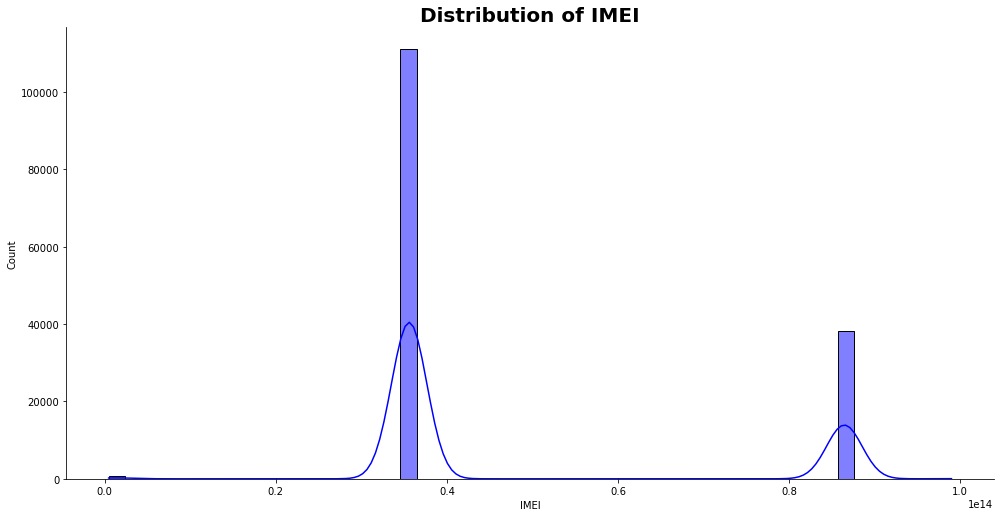

In [26]:
# use the data_plots file( utitlity functions)
from data_plots import plot_hist,plot_count,plot_box,plot_scatter,plot_bar,plot_box_multi,plot_heatmap

plot_hist(df, "IMEI", "blue")

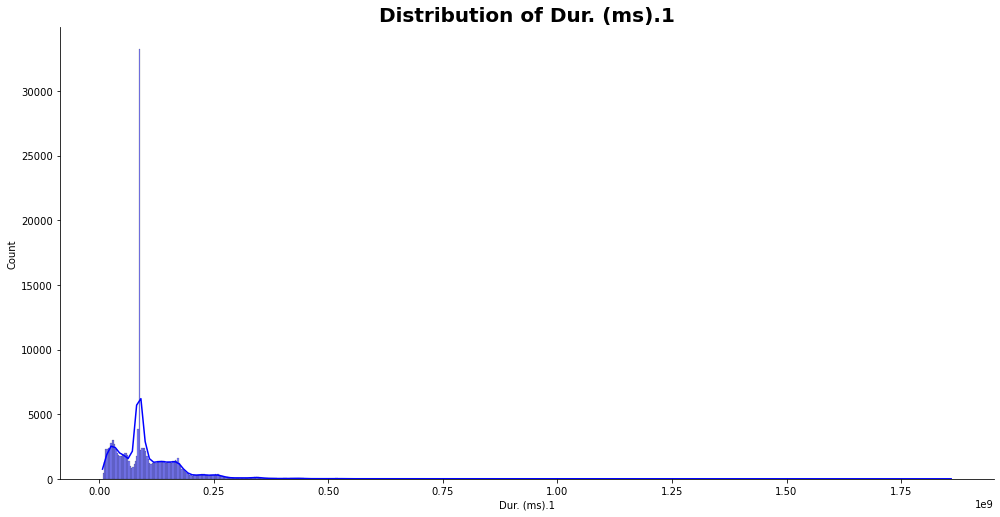

In [27]:
plot_hist(df, "Dur. (ms).1", "blue")

In [28]:
# display all columns in the dataframe
pd.options.display.max_columns = None
df.head(1)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.000,2019-04-04 12:01:00,770.000,2019-04-25 14:35:00,662.000,1823652.000,208201448079117.000,33664962239.000,35521209507511.000,9.16456699548519E+015,42.000,5.000,23.000,44.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,37624.000,38787.000,1823652892.000,Samsung,Samsung Galaxy A5 Sm-A520F,213.000,214.000,1545765.000,24420.000,1634479.000,1271433.000,3563542.000,137762.000,15854611.000,2501332.000,8198936.000,9656251.000,278082303.000,14344150.000,171744450.000,8814393.000,36749741.000,308879636.000


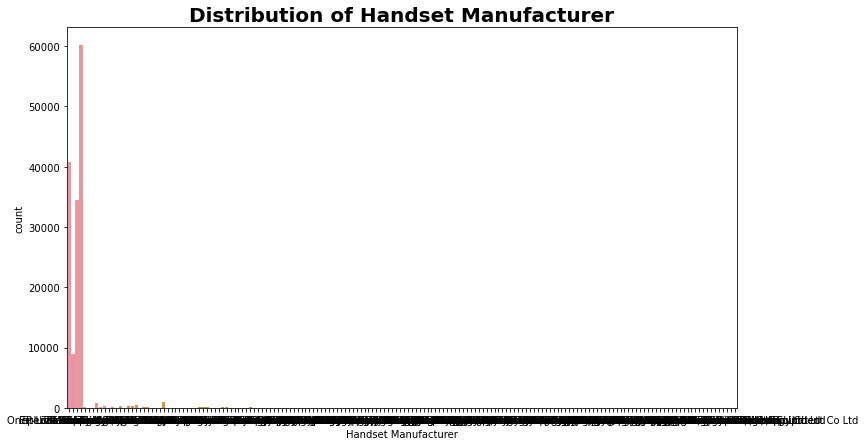

In [29]:
# univariat analysis of 'Handset Manufacturer'
plot_count(df, 'Handset Manufacturer')

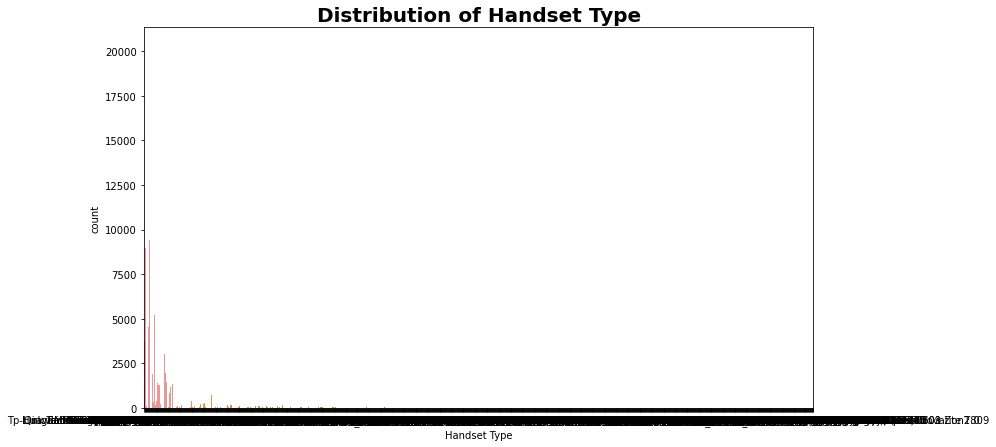

In [30]:
# univariat analysis of 'Handset Type'
plot_count(df, 'Handset Type')

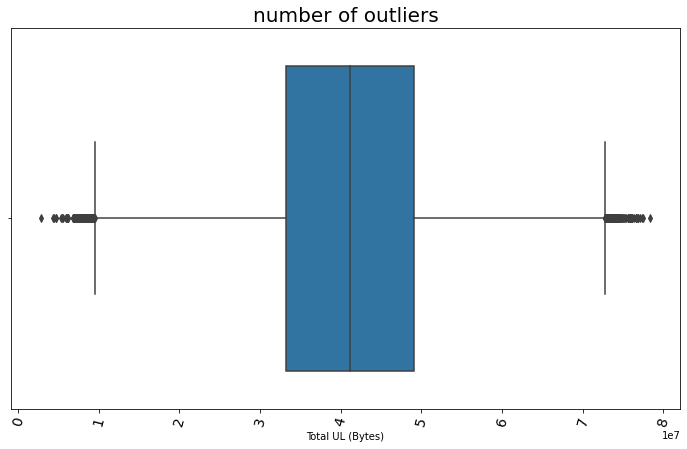

In [31]:
plot_box(df, 'Total UL (Bytes)', "number of outliers")

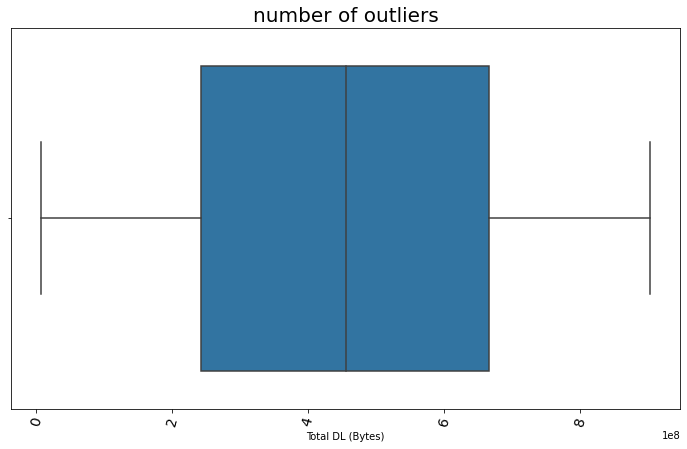

In [32]:
plot_box(df, 'Total DL (Bytes)', "number of outliers")

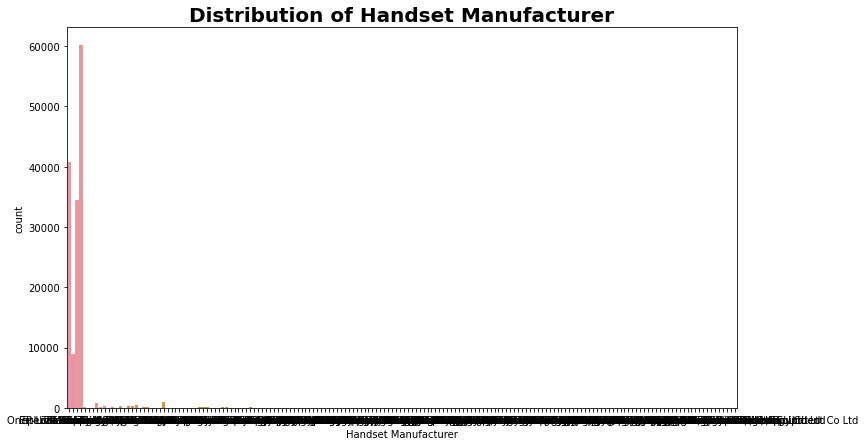

In [35]:
plot_count(df, "Handset Manufacturer")

### Multivariate Analysis

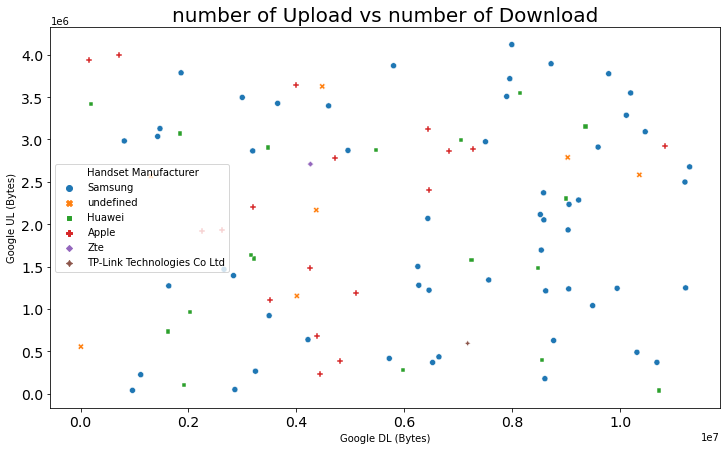

In [33]:
plot_scatter(df.head(100), x_col="Google DL (Bytes)", y_col="Google UL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="number of Upload vs number of Download using Google")

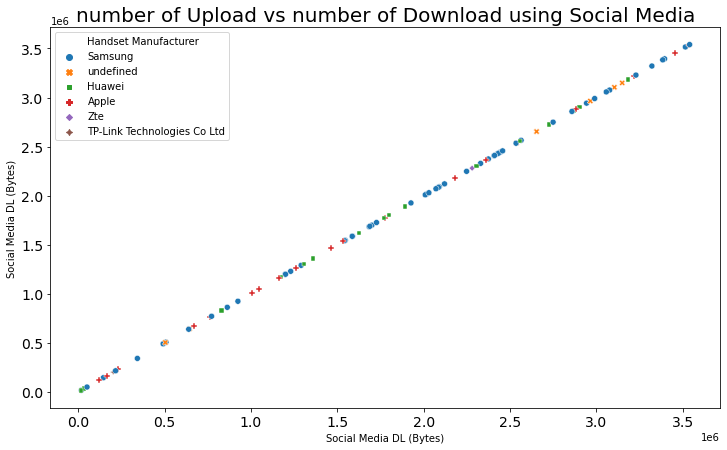

In [39]:
plot_scatter(df.head(100), x_col="Social Media DL (Bytes)", y_col="Social Media DL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="number of Upload vs number of Download using Social Media")

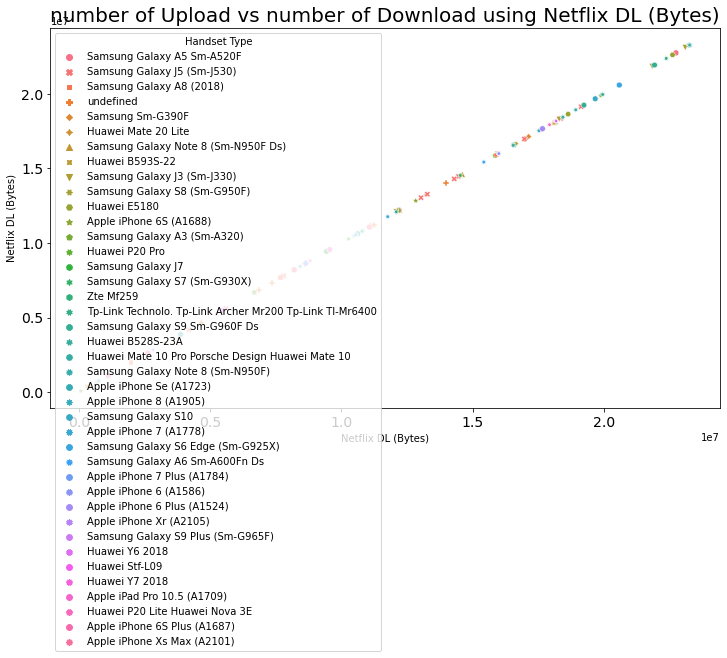

In [41]:
plot_scatter(df.head(100), x_col="Netflix DL (Bytes)", y_col="Netflix DL (Bytes)", hue="Handset Type",
             style="Handset Type", title="number of Upload vs number of Download using Netflix DL (Bytes)")

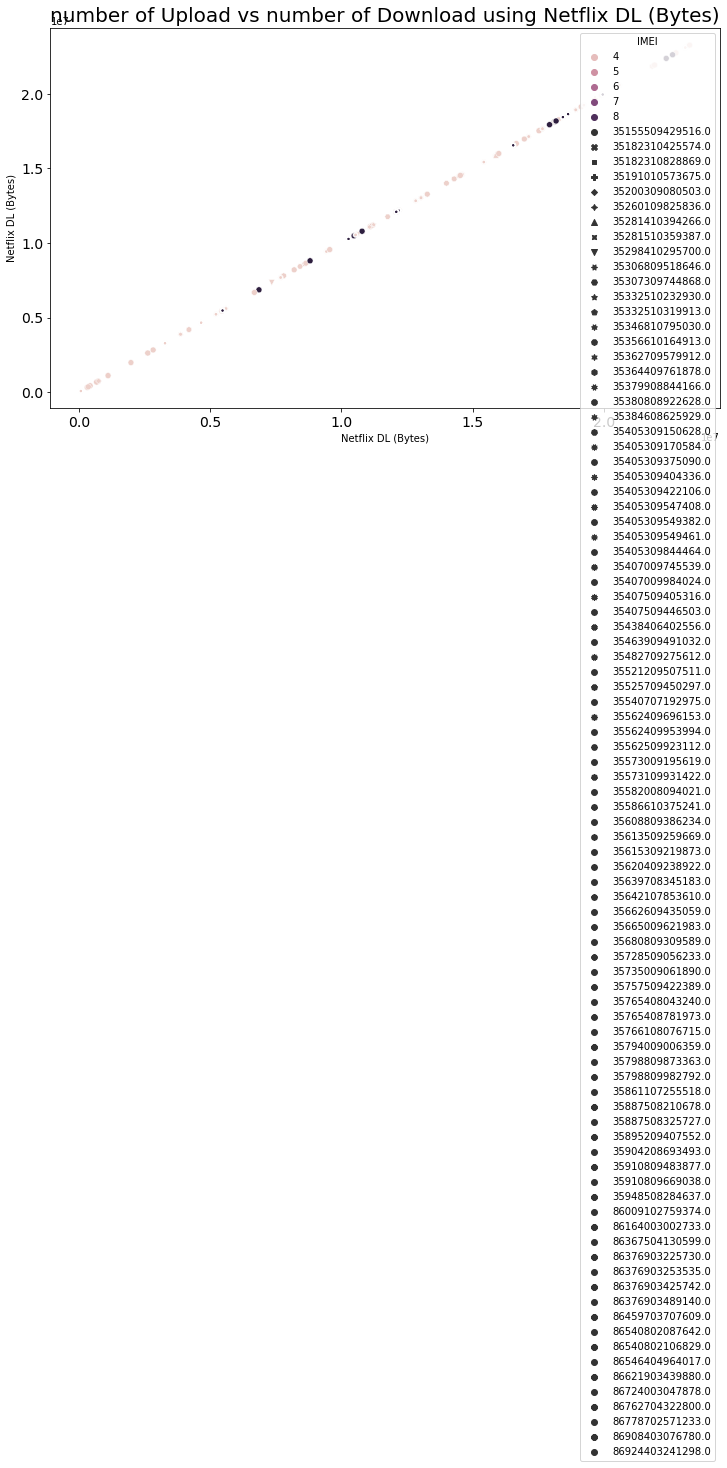

In [42]:
plot_scatter(df.head(100), x_col="Netflix DL (Bytes)", y_col="Netflix DL (Bytes)", hue="IMEI",
             style="IMEI", title="number of Upload vs number of Download using Netflix DL (Bytes)")

In [43]:
dfPair = df[["Handset Manufacturer", "Google DL (Bytes)", "Social Media DL (Bytes)", "Netflix DL (Bytes)"]]

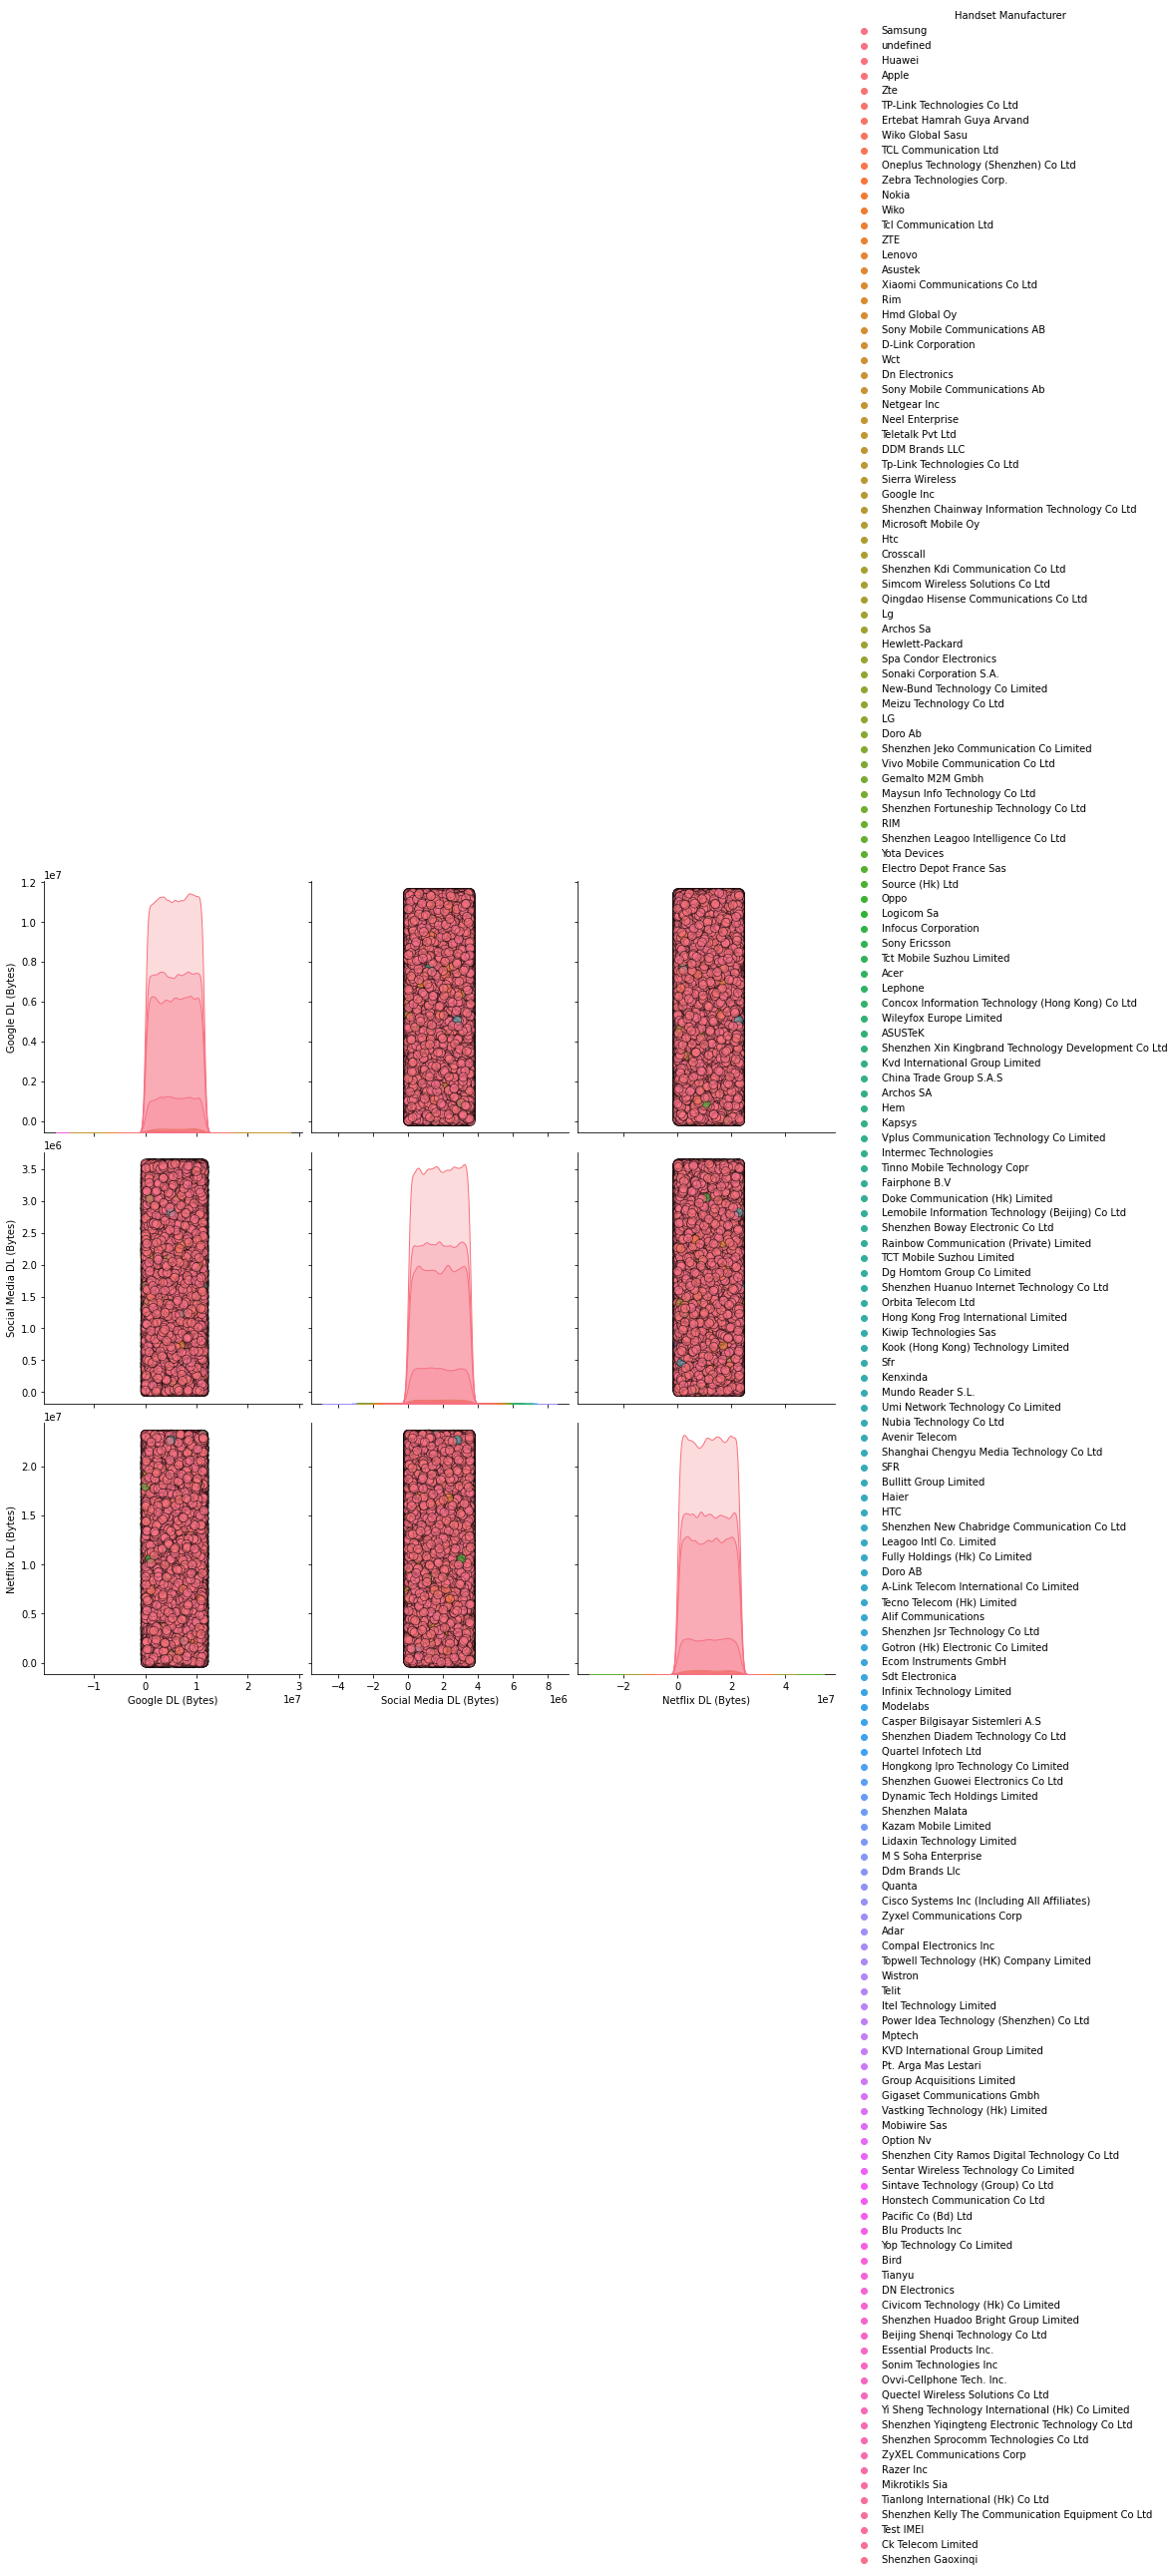

In [45]:
sns.pairplot(dfPair, hue = 'Handset Manufacturer', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

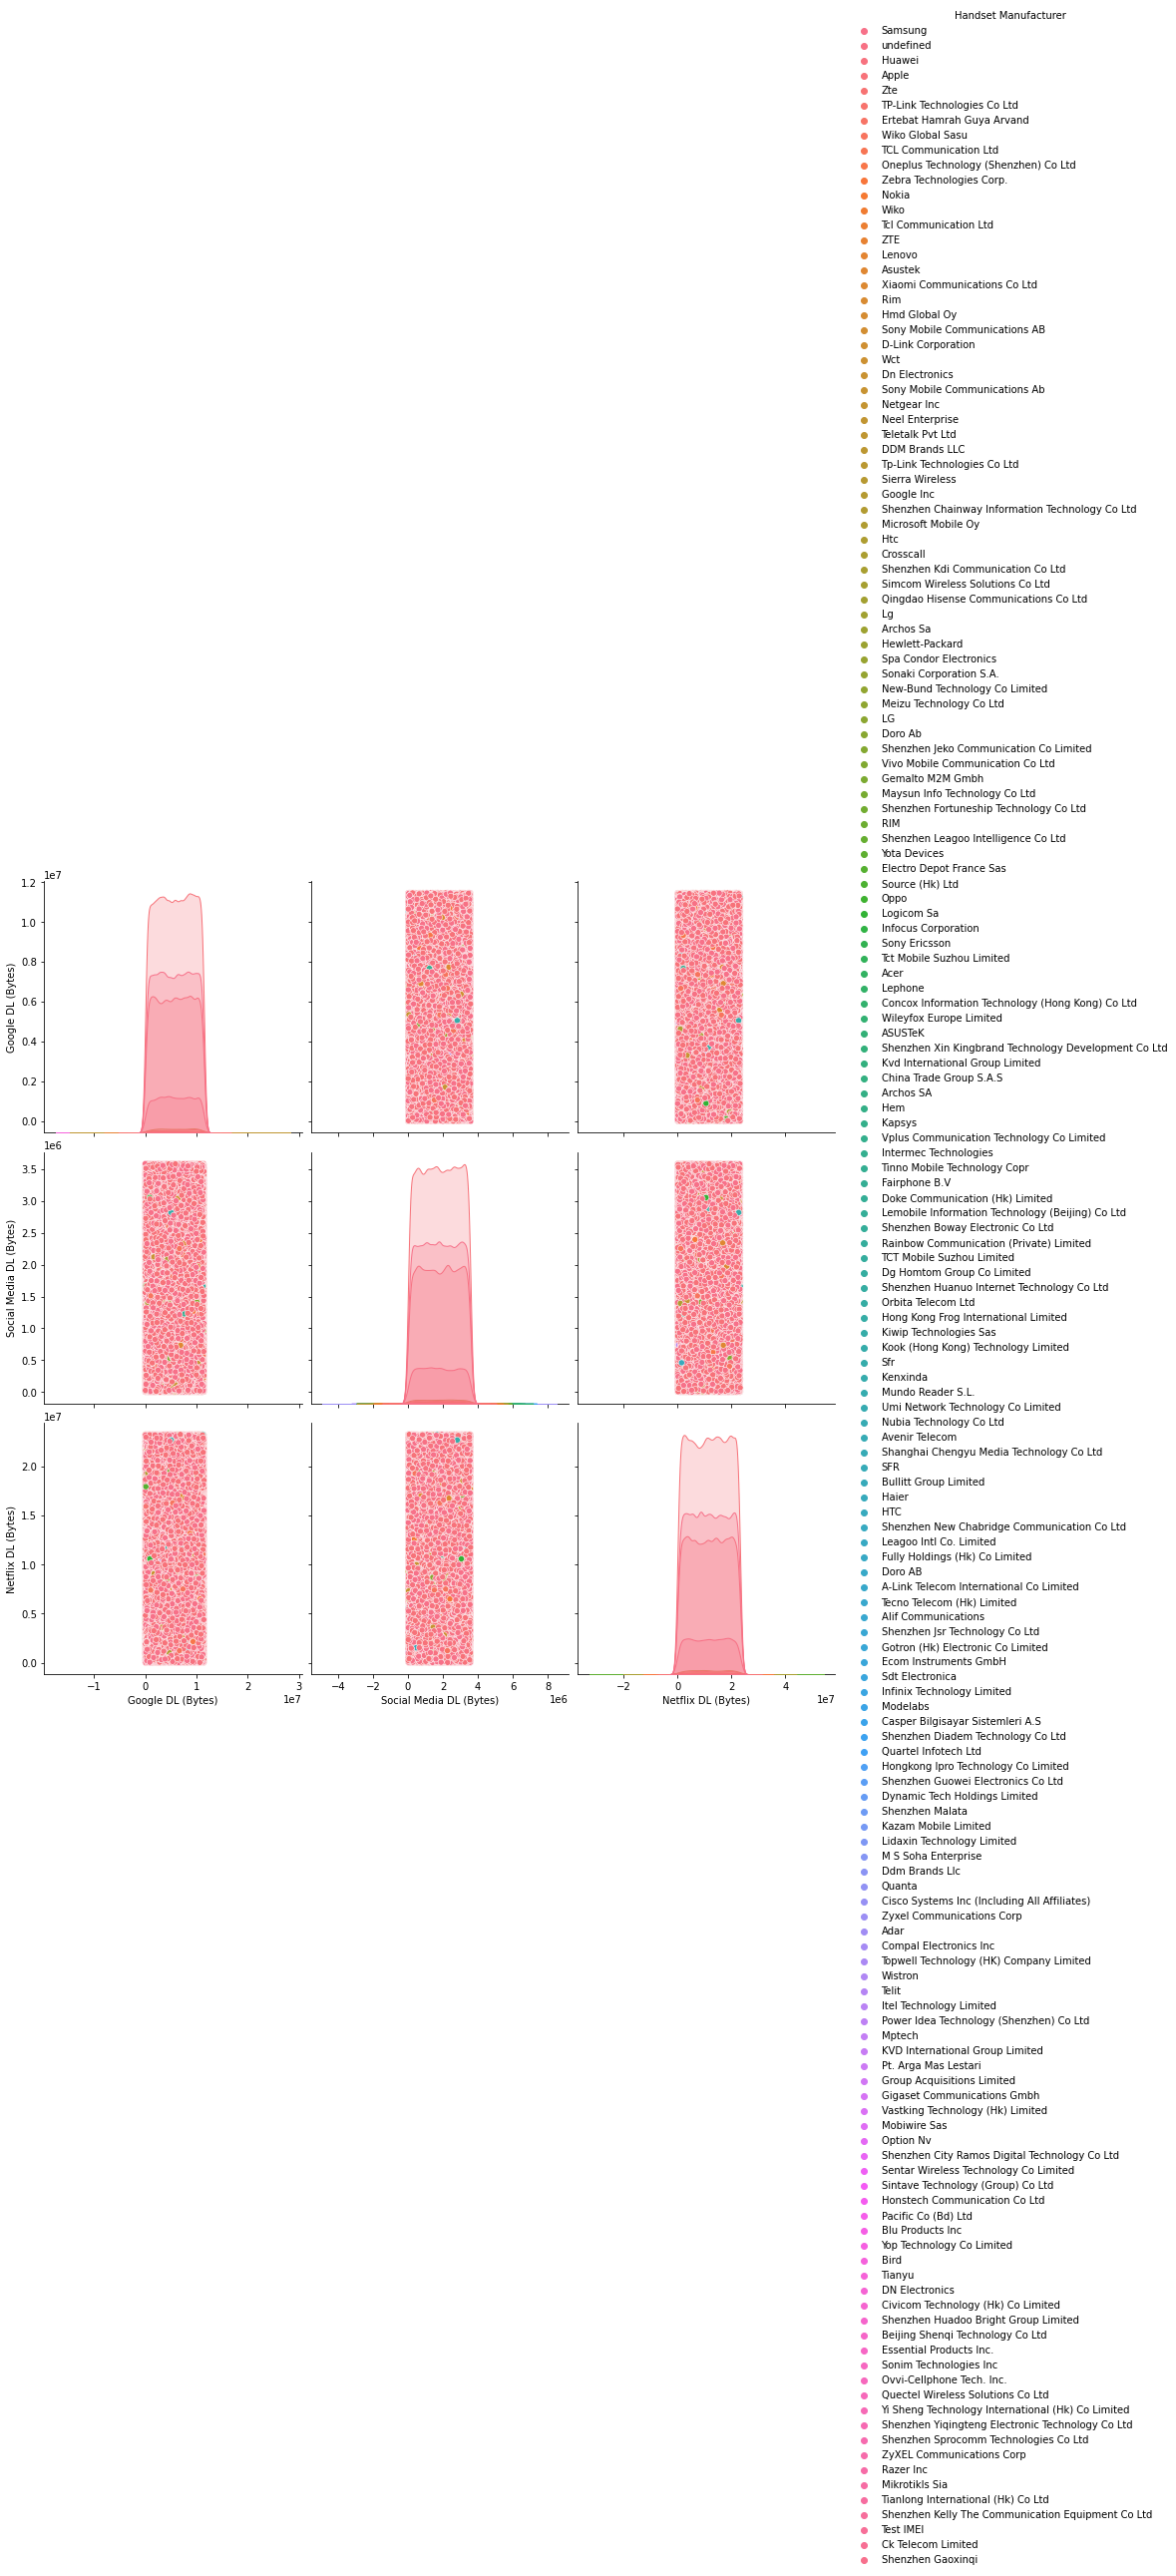

In [48]:
sns.pairplot(dfPair, hue = 'Handset Manufacturer', diag_kind = 'kde',height=4)